# Neural Network Classification

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options)

## Make classification data and get ready

In [2]:
import sklearn

In [3]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create Circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [6]:
# Make DataFrame of circle Data
import pandas as pd
circles = pd.DataFrame({
                        "X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y
                        })
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


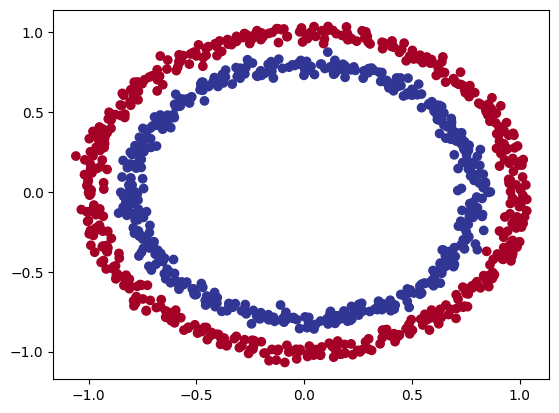

In [7]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

Note: The Data we are working with is often reffered to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

### Check input and output shapes

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample for X and y. \nX={X_sample} \ny={y_sample}")
print(f"Shapes for one sample for X and y. \nX={X_sample.shape} \ny={y_sample.shape}")

Values for one sample for X and y. 
X=[0.75424625 0.23148074] 
y=1
Shapes for one sample for X and y. 
X=(2,) 
y=()


### Turn Data into Tensors and create train and test splits

In [10]:
import torch

In [11]:
# Turn data into Tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [12]:
# Split Data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [13]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## Building a Model

Let's build a model to classify our blue and red dots

To do so, we want to :
1. Setup device agnostic code, so our code will run on an accelerator (GPU) if there is one
2. Construct a Model (by subclassing `nn.Module`)
3. Define loss fn and optimizer
4. Creating Training and Test Loop

In [14]:
import torch
from torch import nn
# Make Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [15]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code, let's create a model that:

1. Subclass `nn.Module` (Almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Define a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and send it to target `device`

In [16]:
# 1. Construct a Model that subclasses nn.Module
class circleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # Takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # Takes in 5 features and downscales it to 1

  # 3. Defines a forward() Method that outlines the forward pass
  def forward(self, X):
    return self.layer_2(self.layer_1(X)) # X goes into layer_1 and the outputs goes to layer_2 (x -> layer_1 -> layer_2 -> output)

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = circleModelV0().to(device)
model_0

circleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [18]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2382,  0.6075],
                      [ 0.6136, -0.3309],
                      [-0.0827,  0.3648],
                      [-0.0669,  0.5637],
                      [ 0.3516, -0.3509]], device='cuda:0')),
             ('0.bias',
              tensor([-0.5394, -0.6453,  0.5683, -0.2215, -0.6703], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.3871,  0.3301, -0.2899, -0.0887,  0.1810]], device='cuda:0')),
             ('1.bias', tensor([0.0463], device='cuda:0'))])

In [20]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Len of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Len of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"First 10 Preds:\n{untrained_preds[:10]}")
print(f"First 10 labels:\n{y_test[:10]}")

Len of predictions: 200, Shape: torch.Size([200, 1])
Len of test samples: 200, Shape: torch.Size([200, 2])
First 10 Preds:
tensor([[-0.7821],
        [-0.7284],
        [-0.7559],
        [-0.7903],
        [-0.4906],
        [-0.4598],
        [-0.5188],
        [-0.4552],
        [-0.7671],
        [-0.7219]], device='cuda:0')
First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## Setup loss fn and optimizer

Which loss function or optimizer should I use?

This is problem specific..

For Example for regression you might want MAE or MSE (mean absolute error or mean squared error)

For classification you might want binary cross entropy or categorical cross entropy (cross entropy)

As a reminder, the loss function measures how *wrong* the models are

And for optimizers two of the most common and useful are SGD and Adam, however PyTorch has many built in options.

* For the loss function we are gonna use `torch.nn.BECWithLogitsLoss()`
* For a definition what a logit is in Deep Learning
* For different optimizers see `torch.optim`

In [21]:
# Setup loss fn
# loss_fn = nn.BCELoss() # BCELoss requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # Sigmoid activation function built in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [22]:
# Calculate Accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = correct / len(y_pred) * 100
  return acc

## Train our model

To train our model we are going to build a training loop:

1. Forward pass
2. Calculate loss
3. Optimizer zero grad
4. Loss Backward (backpropagation)
5. Optimizer step (gradient descent)

### Going from raw logits -> prediction probabilities -> predicion labels

Our model outputs are going to be raw **logits**

We can convert these logits into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification)

Then we can convert our model probabilities to **prediction labels** by either rounding them or taking the `argmax()`

In [23]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.7821],
        [-0.7284],
        [-0.7559],
        [-0.7903],
        [-0.4906]], device='cuda:0')

For our prediction probability values we need to perform a range style rounding on them
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [24]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3139],
        [0.3255],
        [0.3195],
        [0.3121],
        [0.3798]], device='cuda:0')

In [25]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

## Making Training Loop

In [26]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):
  model_0.train()

  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # Turn logits -> pred probs -> pred labels

  # Calc Loss / Accuracy
  loss = loss_fn(y_logits, # Excpects raw logits
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()


  ### Testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test_Loss: {test_loss:.5f} | Test_acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.74601 | Acc: 50.00% | Test_Loss: 0.73971 | Test_acc: 50.00%
Epoch: 10 | Loss: 0.70621 | Acc: 50.00% | Test_Loss: 0.70501 | Test_acc: 50.00%
Epoch: 20 | Loss: 0.69656 | Acc: 50.00% | Test_Loss: 0.69665 | Test_acc: 50.00%
Epoch: 30 | Loss: 0.69404 | Acc: 50.00% | Test_Loss: 0.69456 | Test_acc: 50.00%
Epoch: 40 | Loss: 0.69334 | Acc: 42.00% | Test_Loss: 0.69407 | Test_acc: 43.50%
Epoch: 50 | Loss: 0.69313 | Acc: 47.62% | Test_Loss: 0.69400 | Test_acc: 49.50%
Epoch: 60 | Loss: 0.69306 | Acc: 49.25% | Test_Loss: 0.69404 | Test_acc: 49.00%
Epoch: 70 | Loss: 0.69303 | Acc: 50.38% | Test_Loss: 0.69410 | Test_acc: 48.00%
Epoch: 80 | Loss: 0.69302 | Acc: 50.50% | Test_Loss: 0.69416 | Test_acc: 47.50%
Epoch: 90 | Loss: 0.69301 | Acc: 50.88% | Test_Loss: 0.69421 | Test_acc: 47.00%


## Make predictions and evalutate the model

From the metrics it looks like our model isn't learning anything

So to inspect it let's make some predictions and make them visual

To do so we are going to import a function called `plot_decision_boundary()`

In [27]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exist")
else:
  print("Downloading...")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary



Downloading...


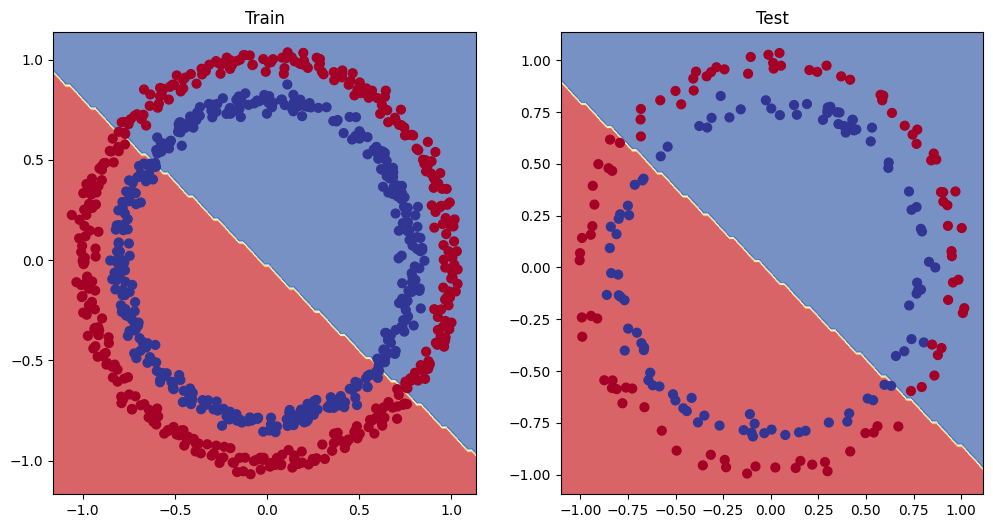

In [28]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## Improving a Model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer (Epochs = 1000)
* Changing the activation function
* Change the Learning Rate
* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data

And because these options are all values we (as ML engeneers and data scientist) can chang, they are reffered as **hyperparameters**

Let's try improve our model by:
* Adding more units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [29]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, X):
    ''' z = self.layer_1(X)
    z = self.layer_2(z)
    z = self.layer_3(z) '''
    return self.layer_3(self.layer_2(self.layer_1(X))) # This way of writing operations, speeds up behind the scenes

model_1 = CircleModelV1().to(device)
model_1



CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [30]:
# Create Loss Function
loss_fn = nn.BCEWithLogitsLoss() # Sigmoid activation function built in

# Create Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [31]:

# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()
  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> prediction labels

  # 2. Calculate the loss/acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test_Loss: {test_loss:.5f} | Test_acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396 | Acc: 50.88% | Test_Loss: 0.69261 | Test_acc: 51.00%
Epoch: 100 | Loss: 0.69305 | Acc: 50.38% | Test_Loss: 0.69379 | Test_acc: 48.00%
Epoch: 200 | Loss: 0.69299 | Acc: 51.12% | Test_Loss: 0.69437 | Test_acc: 46.00%
Epoch: 300 | Loss: 0.69298 | Acc: 51.62% | Test_Loss: 0.69458 | Test_acc: 45.00%
Epoch: 400 | Loss: 0.69298 | Acc: 51.12% | Test_Loss: 0.69465 | Test_acc: 46.00%
Epoch: 500 | Loss: 0.69298 | Acc: 51.00% | Test_Loss: 0.69467 | Test_acc: 46.00%
Epoch: 600 | Loss: 0.69298 | Acc: 51.00% | Test_Loss: 0.69468 | Test_acc: 46.00%
Epoch: 700 | Loss: 0.69298 | Acc: 51.00% | Test_Loss: 0.69468 | Test_acc: 46.00%
Epoch: 800 | Loss: 0.69298 | Acc: 51.00% | Test_Loss: 0.69468 | Test_acc: 46.00%
Epoch: 900 | Loss: 0.69298 | Acc: 51.00% | Test_Loss: 0.69468 | Test_acc: 46.00%


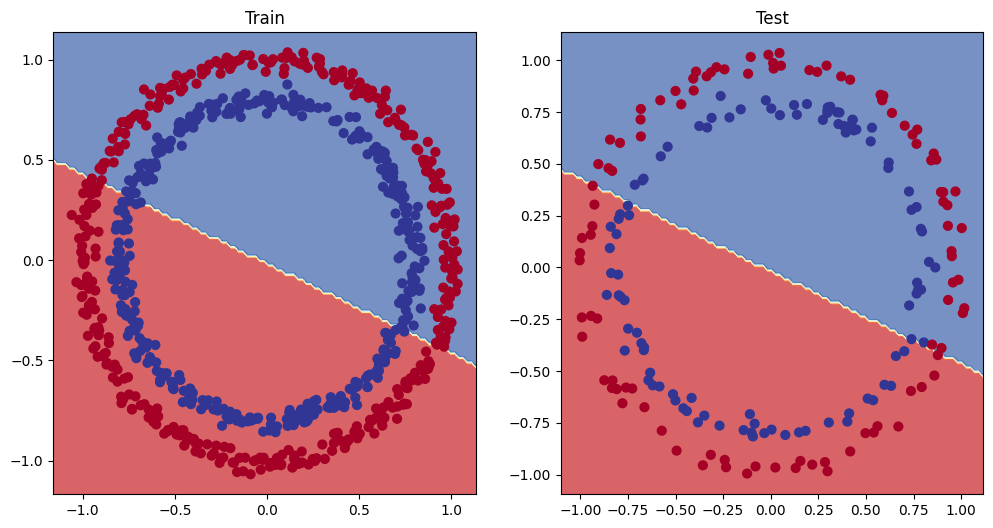

In [32]:
# Plot the decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### Preparing data to see if our model can fit a straight line

One way to toubleshoot to a  larger problem is to test out a smaller problem

In [33]:
# Create some data (Same as Notebook 1)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression

# Check data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [34]:
# ⁄⁄
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(X_test_regression)

(80, 20)

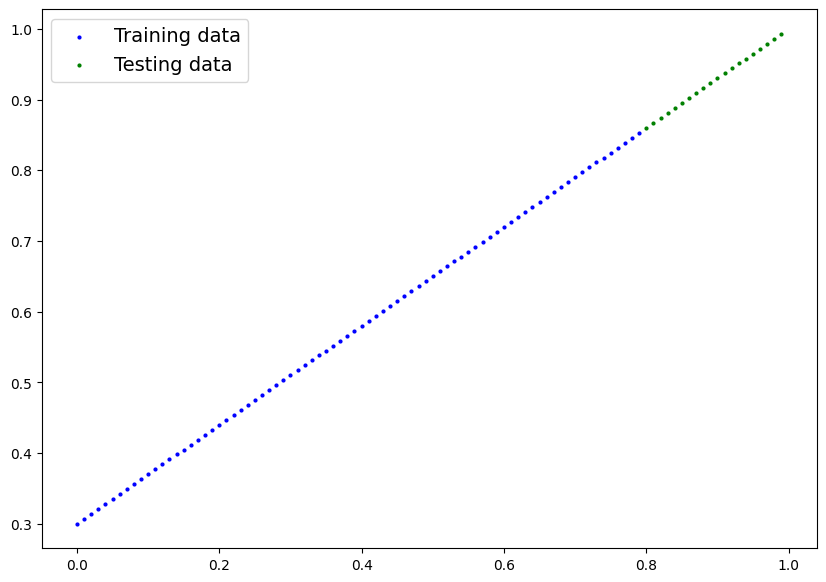

In [35]:
plot_predictions(X_train_regression, y_train_regression, X_test_regression, y_test_regression)

### Adjusting `model_1` to fit a straight line

In [36]:
# Same architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(1, 10),
    nn.Linear(10, 10),
    nn.Linear(10, 1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [37]:
# Loss and Optimizer
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(model_2.parameters(), 0.000001)

In [38]:
# Train Model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train_regression = X_train_regression.to(device)
y_train_regression = y_train_regression.to(device)
X_test_regression = X_test_regression.to(device)
y_test_regression = y_test_regression.to(device)


for epoch in range(epochs):
  model_2.train()

  y_pred = model_2(X_train_regression)

  loss = loss_fn(y_pred, y_train_regression)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()


  # Testing
  model_2.eval()

  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")


Epoch: 0 | Loss: 0.75986 | Test Loss: 0.95396
Epoch: 100 | Loss: 0.75948 | Test Loss: 0.95353
Epoch: 200 | Loss: 0.75910 | Test Loss: 0.95309
Epoch: 300 | Loss: 0.75872 | Test Loss: 0.95266
Epoch: 400 | Loss: 0.75833 | Test Loss: 0.95223
Epoch: 500 | Loss: 0.75795 | Test Loss: 0.95180
Epoch: 600 | Loss: 0.75757 | Test Loss: 0.95136
Epoch: 700 | Loss: 0.75719 | Test Loss: 0.95093
Epoch: 800 | Loss: 0.75681 | Test Loss: 0.95050
Epoch: 900 | Loss: 0.75643 | Test Loss: 0.95007


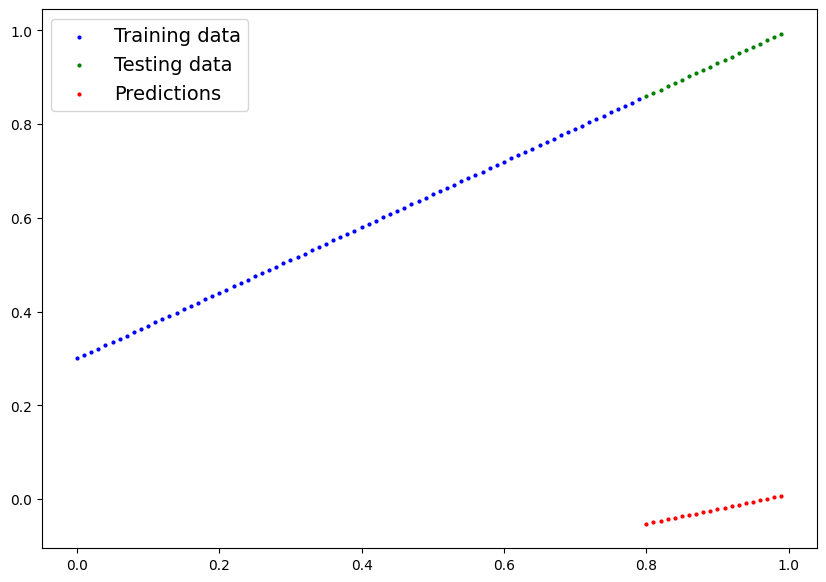

In [39]:
# Turn on eval mode
model_2.eval()

# Make predictions
with torch.inference_mode():
  y_preds = model_2(X_test_regression)


plot_predictions(X_train_regression.cpu(), y_train_regression.cpu(), X_test_regression.cpu(), y_test_regression.cpu(), y_preds.cpu())

## The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

Or in ML terms, an infinite (but really it is finite) of linear and non-linear functions?

### Recreating non Linear Data (Red and Blue Circles)

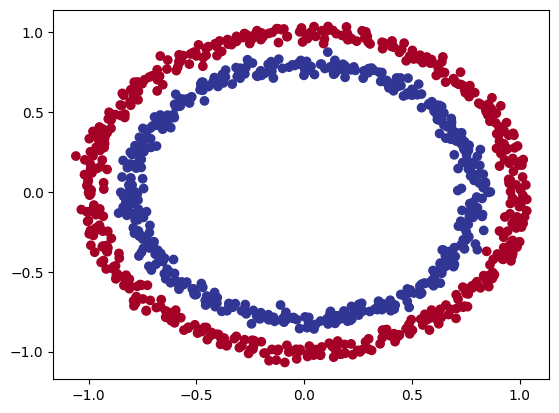

In [40]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [41]:
# Convert data to tensors and then train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### Building a model with non-linearity

* Linear -> Straight lines
* Non-Linear -> non-straight lines

NN are a large combination of linear (straight) and non-linear (non-straight) functions which are potentially able to find patterns in data

In [42]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(2, 10)
    self.layer_2 = nn.Linear(10, 10)
    self.layer_3 = nn.Linear(10, 1)
    self.relu = nn.ReLU() # Relu is a non-linear activation function

  def forward(self, X):
    # Where should we put our non-linear activation functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(X)))))

model_3 = CircleModelV2()
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [43]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss() # Sigmoid activation function built in

# Create Optimizer
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

### Training a model with non-linearity

In [44]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

model_3.to(device)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,
                 y_train)

  acc = accuracy_fn(y_train,
                    y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()


  # Training
  model_3.eval()
  with torch.inference_mode():
    y_test_logits = model_3(X_test).squeeze()
    y_test_pred = torch.round(torch.sigmoid(y_test_logits))

    test_loss = loss_fn(y_test_logits,
                        y_test)
    test_acc = accuracy_fn(y_test,
                           y_test_pred)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test_Loss: {test_loss:.5f} | Test_acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295 | Acc: 50.00% | Test_Loss: 0.69319 | Test_acc: 50.00%
Epoch: 100 | Loss: 0.69115 | Acc: 52.88% | Test_Loss: 0.69102 | Test_acc: 52.50%
Epoch: 200 | Loss: 0.68977 | Acc: 53.37% | Test_Loss: 0.68940 | Test_acc: 55.00%
Epoch: 300 | Loss: 0.68795 | Acc: 53.00% | Test_Loss: 0.68723 | Test_acc: 56.00%
Epoch: 400 | Loss: 0.68517 | Acc: 52.75% | Test_Loss: 0.68411 | Test_acc: 56.50%
Epoch: 500 | Loss: 0.68102 | Acc: 52.75% | Test_Loss: 0.67941 | Test_acc: 56.50%
Epoch: 600 | Loss: 0.67515 | Acc: 54.50% | Test_Loss: 0.67285 | Test_acc: 56.00%
Epoch: 700 | Loss: 0.66659 | Acc: 58.38% | Test_Loss: 0.66322 | Test_acc: 59.00%
Epoch: 800 | Loss: 0.65160 | Acc: 64.00% | Test_Loss: 0.64757 | Test_acc: 67.50%
Epoch: 900 | Loss: 0.62362 | Acc: 74.00% | Test_Loss: 0.62145 | Test_acc: 79.00%


### Evaluating a model trained with non-linear activation functions

In [45]:
# Make some predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

print(y_preds == y_test)
y_preds[:10], y_test[:10]

tensor([ True,  True,  True,  True, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False,  True,  True,  True, False,  True,
         True,  True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True, False,  True,  True, False,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,  True,
         True, False,  True,  True,  True,  True,  True, False,  True,  True,
        False,  True,  True, False, False,  True,  True,  True, 

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

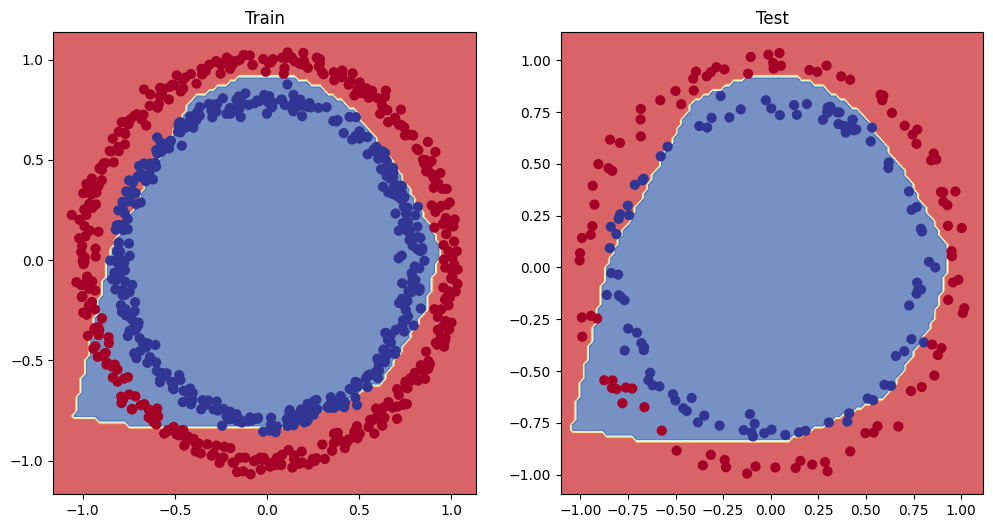

In [46]:
# Plotting decision boundries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## Replicating non-linear activation functions

NN, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the best patterns on its own.

And these tools are linear and non-linear functions

In [47]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float)
A.dtype

torch.float32

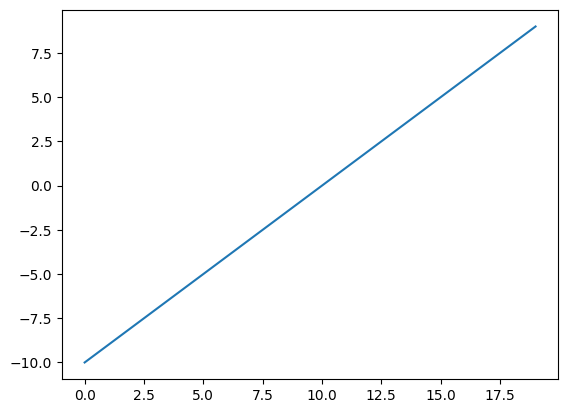

In [48]:
# Visualize
plt.plot(A)

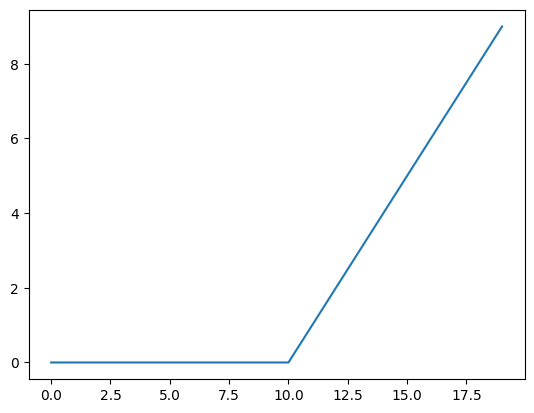

In [49]:
plt.plot(torch.relu(A))

In [50]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.max(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

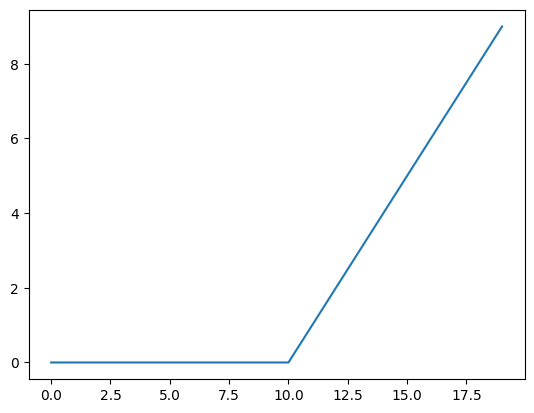

In [51]:
# Plot relu
plt.plot(relu(A))

In [52]:
# Now let's do the same for sigmoid
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs


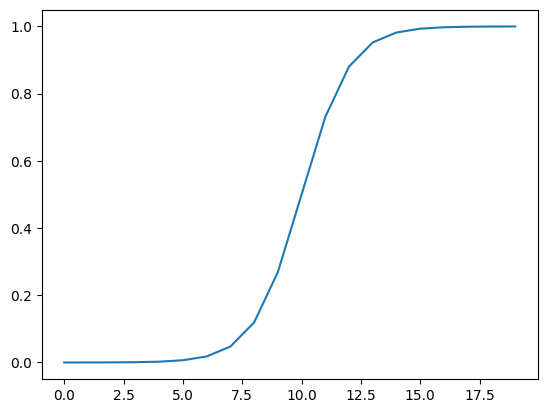

In [53]:
%time
plt.plot(torch.sigmoid(A))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


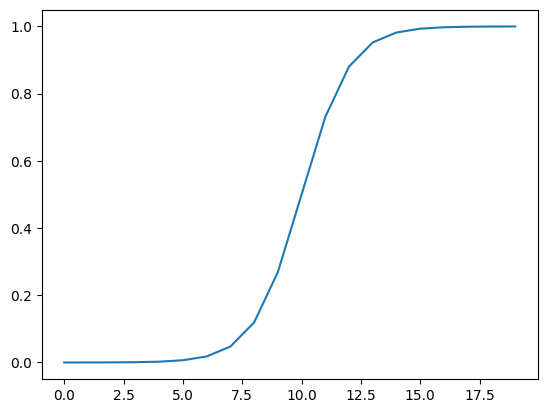

In [54]:
%time
plt.plot(sigmoid(A))

## Putting it all together: With a multi class classification problem

* Binary Classification - one thing or another (Cat or Dog, Spam or not Spam, Fraud or not Fraud)
* Multiclass Classification - More than one thing (Cat, Dog or Chicken)

### Creating a toy multi-class dataset

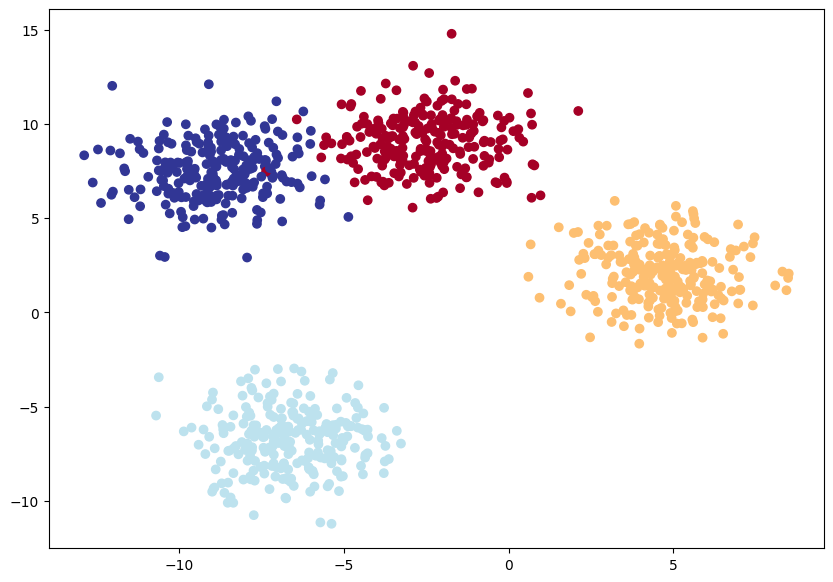

In [55]:
# Import
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from torch import nn


# Set Hyperparameters form Blobs
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# Create Multiclass Data
X_blob, y_blob  = make_blobs(n_samples=1000,
                             n_features=NUM_FEATURES,
                             centers=NUM_CLASSES,
                             cluster_std=1.5,
                             random_state=RANDOM_SEED)

# Turn Data into Tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.long)

# Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# Plot Data (Visualize)
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

### Building a multi class classification model in PyTorch

In [56]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [57]:
# Build a multi-class classification Model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializese mulit-class classification

    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of output features to the model
      hidden_units (int): Number of hidden units between layers, default is 8
    """
    super().__init__()

    self.linear_layer_stack = nn.Sequential(
      nn.Linear(in_features=input_features, out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=output_features)
    )
  def forward(self, X: torch.Tensor) -> torch.Tensor:
    return self.linear_layer_stack(X)

# Create an instance and send to target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [58]:
X_blob_train.shape, y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [59]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### Create Loss and Optimizer for a multi class classification


In [60]:
loss_fn = nn.CrossEntropyLoss() # Measures how much wrong it is

optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1) # Updates our model parameters to try and reduce the loss

### Getting Prediction probabilities for a multi-class PyTorch Model

In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction lables.

Logits (raw output) -> Pred Probs (use  `torch.softmax` -> Pred Labels (take the argmax of the pred probs)

In [61]:
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)

In [62]:
X_blob_test

tensor([[  4.6675,   4.4878],
        [ -7.9969,   6.8803],
        [ -6.2801,  -7.8571],
        [  3.6833,   1.1767],
        [ -0.1404,  10.1654],
        [ -9.7570,   7.8658],
        [ -4.4295,  -8.5996],
        [ -2.1731,   9.0332],
        [ -9.2145,  -7.5223],
        [ -1.4015,   9.2713],
        [ -3.2043,   8.3157],
        [  5.6627,   4.7432],
        [ -0.7720,  10.2018],
        [ -2.0123,  10.4776],
        [ -1.7302,  11.3134],
        [ -6.7496,   6.9485],
        [ -8.3306,   6.8804],
        [ -5.4338,  -3.5643],
        [ -8.5540,   8.8251],
        [ -8.7147,   5.1372],
        [ -7.0068,   8.1967],
        [ -2.1881,   7.1457],
        [  0.9324,   0.7778],
        [ -4.2757,  -6.5832],
        [ -4.6285,  -5.6048],
        [ -8.0851,  -4.4214],
        [-10.0527,   7.9596],
        [ -0.3325,  10.4532],
        [  4.0984,   3.7122],
        [ -3.3258,   9.1807],
        [ -7.3375,   6.3176],
        [  4.5657,   2.9854],
        [  4.0945,   1.8878],
        [-

In [63]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [64]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [65]:
# Convert our models logit output to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In [66]:
# Convert our models prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

### Creating a training loop and testing loop for a multiclass PyTorch Model

In [67]:
# Fit the multi class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
  ### Training
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_blob_train, y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()


  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_blob_test, test_preds)

  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test_Loss: {test_loss:.5f} | Test_acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.15883 | Acc: 40.38% | Test_Loss: 1.07554 | Test_acc: 48.00%
Epoch: 100 | Loss: 0.03312 | Acc: 99.25% | Test_Loss: 0.02433 | Test_acc: 99.50%
Epoch: 200 | Loss: 0.02657 | Acc: 99.25% | Test_Loss: 0.01651 | Test_acc: 99.50%
Epoch: 300 | Loss: 0.02503 | Acc: 99.25% | Test_Loss: 0.01440 | Test_acc: 99.50%
Epoch: 400 | Loss: 0.02427 | Acc: 99.25% | Test_Loss: 0.01335 | Test_acc: 99.50%
Epoch: 500 | Loss: 0.02377 | Acc: 99.25% | Test_Loss: 0.01269 | Test_acc: 99.50%
Epoch: 600 | Loss: 0.02339 | Acc: 99.25% | Test_Loss: 0.01218 | Test_acc: 99.50%
Epoch: 700 | Loss: 0.02307 | Acc: 99.25% | Test_Loss: 0.01179 | Test_acc: 99.50%
Epoch: 800 | Loss: 0.02279 | Acc: 99.25% | Test_Loss: 0.01147 | Test_acc: 99.50%
Epoch: 900 | Loss: 0.02253 | Acc: 99.25% | Test_Loss: 0.01120 | Test_acc: 99.50%


### Making and Evalutaing Prediction with a PyTorch Multiclass Model

In [68]:
# Make Pred
model_4.eval()
with torch.inference_mode():
  y_pred_logits = model_4(X_blob_test)

# View first 10 Pred
y_pred_logits[:10]

tensor([[ -2.3751,  10.9387, -10.2038, -11.3271],
        [ -2.1934,  -9.4839,  -6.3062,   5.2289],
        [ -4.9855,  -5.3790,   5.3840,  -4.3115],
        [ -3.0428,   8.1532,  -5.4971,  -6.6867],
        [  6.4903,  -2.8976, -12.3324,  -8.4675],
        [ -2.7724, -11.1928,  -7.4741,   6.3900],
        [ -4.3608,  -4.5814,   4.6890,  -3.5910],
        [  5.8017,  -6.8308,  -9.7351,  -4.1265],
        [ -6.3789,  -6.9228,   6.6638,  -5.5251],
        [  6.2822,  -5.5357, -10.3558,  -5.4748]], device='cuda:0')

In [69]:
# Logits -> prediction
y_pred_probs = torch.softmax(y_pred_logits, dim=1)
y_pred_probs[:10]

tensor([[1.6516e-06, 1.0000e+00, 6.5756e-10, 2.1386e-10],
        [5.9742e-04, 4.0743e-07, 9.7751e-06, 9.9939e-01],
        [3.1372e-05, 2.1166e-05, 9.9989e-01, 6.1553e-05],
        [1.3729e-05, 9.9998e-01, 1.1797e-06, 3.5901e-07],
        [9.9992e-01, 8.3727e-05, 6.6890e-09, 3.1907e-07],
        [1.0490e-04, 2.3113e-08, 9.5250e-07, 9.9989e-01],
        [1.1735e-04, 9.4122e-05, 9.9954e-01, 2.5340e-04],
        [9.9995e-01, 3.2640e-06, 1.7882e-07, 4.8777e-05],
        [2.1657e-06, 1.2571e-06, 9.9999e-01, 5.0864e-06],
        [9.9998e-01, 7.3711e-06, 5.9456e-08, 7.8340e-06]], device='cuda:0')

In [70]:
# Pred Probs -> Pred Labels
y_preds = torch.argmax(y_pred_probs, dim=1)


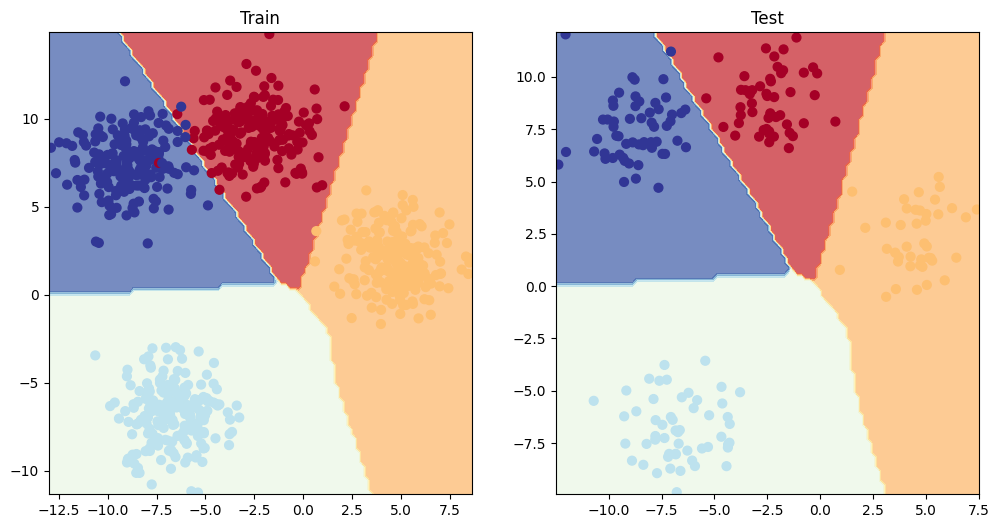

In [71]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## A few more classification metrics... (to evaluate our model)

* Accuracy - Out of a 100 samples, how much does our model get right
* Precision
* Recall
* F1-Score
* Confusion matrix
* Classification report